In [1]:
import io
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv("./student_scores.csv")
#df.head()
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of dataset
print("Shape of Training dataset:", df.shape)

Shape of Training dataset: (25, 2)


In [4]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Describe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


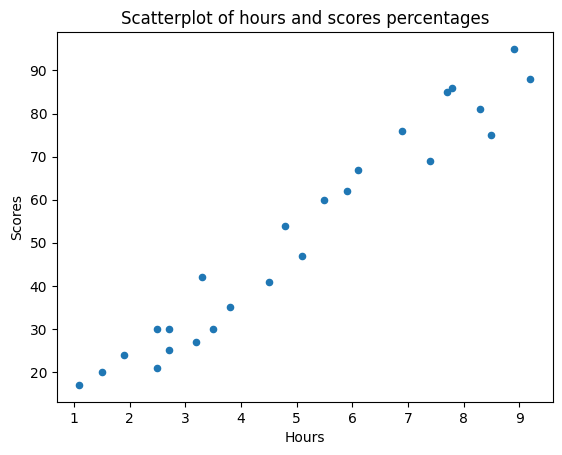

In [6]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

In [7]:
X = df.iloc[:,0:1]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

To dig further into what is happening to our model, we can look at a metric that measures the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error, the R² 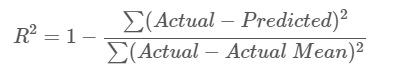



In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train) #it has to be x_test !!
print('train R2', model.score(x_train,y_train))
print('test R2', model.score(x_test,y_test))

train R2 0.9515510725211552
test R2 0.9454906892105355


In [10]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# Q3
**Draw the generated line**

In [11]:
#Coefficients
print(model.intercept_)#bias
print(model.coef_) #weight
#weight X + bias = y

2.0181600414346974
[9.91065648]


In [12]:
# Draw the generated line
start = 0
end = 10
step = 1
X = np.arange(start,end,step)
y = model.coef_[0] *X +model.intercept_
y

array([ 2.01816004, 11.92881652, 21.839473  , 31.75012948, 41.66078596,
       51.57144244, 61.48209893, 71.39275541, 81.30341189, 91.21406837])

Text(0, 0.5, 'Scores')

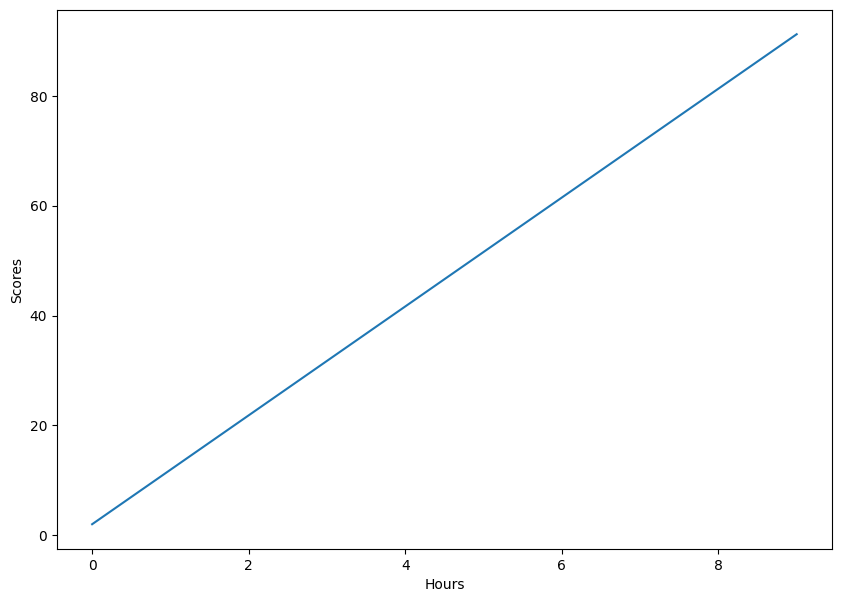

In [13]:
plt.figure(figsize=(10,7))
plt.plot(X,y)
plt.xlabel('Hours')
plt.ylabel('Scores')

In [14]:
from sklearn.metrics import mean_squared_error
print('mean squared error for training set', mean_squared_error(y_train, model.predict(x_train)))
print('mean squared error for test set', mean_squared_error(y_test, model.predict(x_test)))

mean squared error for training set 30.89818237731452
mean squared error for test set 21.598769307217406


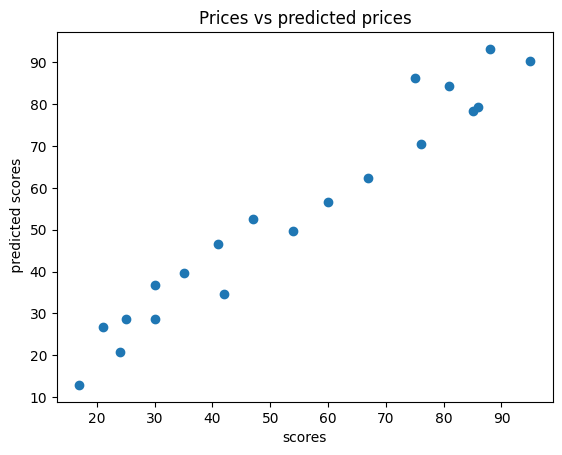

In [15]:
#Visualizing the difference between actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred)
plt.xlabel("scores")
plt.ylabel(" predicted scores")
plt.title("Prices vs predicted prices")
plt.show()

In [16]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Q4
**Scale of sklearn**

In [32]:
from sklearn.preprocessing import scale

X = df.iloc[:,0:13]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]
X = scale(X)
Y = scale(Y)
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [18]:
from sklearn.linear_model import SGDRegressor
model_0 = SGDRegressor(early_stopping=True)
model_0.fit(X_train,y_train)
model_0.score(X_train,y_train)

0.7593207684282696

# Q5
**Training and test loss curves**

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

def sgd_eta0(eta0,epochs):
    model_1 = SGDRegressor(eta0=eta0)
    # model_1.fit(X_train,y_train)

    # An epoch is one loop through the data
    epochs = epochs

    # Create empty loss lists to track values
    train_loss_values = []
    test_loss_values = []
    epoch_count = []

    # 0.loop through the data
    for epoch in range(epochs):
        # setup the model to training mode
        model_1.partial_fit(X_train,y_train,)

        # 1.1 forword pass 
        train_pred = model_1.predict(X_train)

        # 1.2 calculate the loss
        train_loss = mean_absolute_error(train_pred,y_train)

        # 2.1 Forward pass on test data
        test_pred = model_1.predict(X_test)

        # 2.2 Caculate loss on test data
        test_loss = mean_absolute_error(test_pred, y_test) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss)
            test_loss_values.append(test_loss)
    #         print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")
    return epoch_count, train_loss_values, test_loss_values

In [20]:
epoch_count0, train_loss_values0, test_loss_values0 = sgd_eta0(0.01,1000)
epoch_count1, train_loss_values1, test_loss_values1 = sgd_eta0(0.001,1000)
epoch_count2, train_loss_values2, test_loss_values2 = sgd_eta0(0.0001,1000)

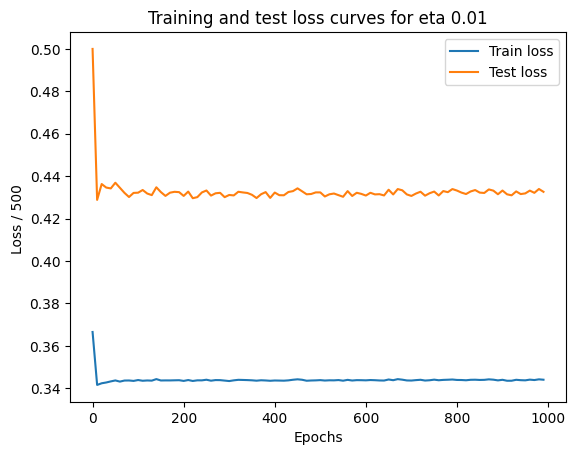

In [21]:
# Plot the loss curves 0
plt.plot(epoch_count0, train_loss_values0, label="Train loss")
plt.plot(epoch_count0, test_loss_values0, label="Test loss")
plt.title("Training and test loss curves for eta 0.01")
plt.ylabel("Loss / 500 ")
plt.xlabel("Epochs")
plt.legend();

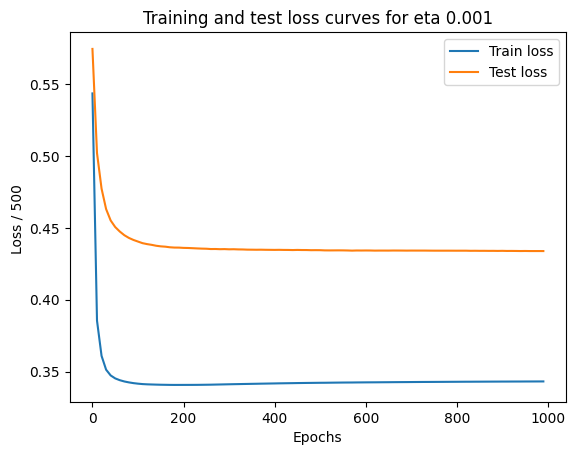

In [22]:
# Plot the loss curves 1
plt.plot(epoch_count1, train_loss_values1, label="Train loss")
plt.plot(epoch_count1, test_loss_values1, label="Test loss")
plt.title("Training and test loss curves for eta 0.001")
plt.ylabel("Loss / 500 ")
plt.xlabel("Epochs")
plt.legend();

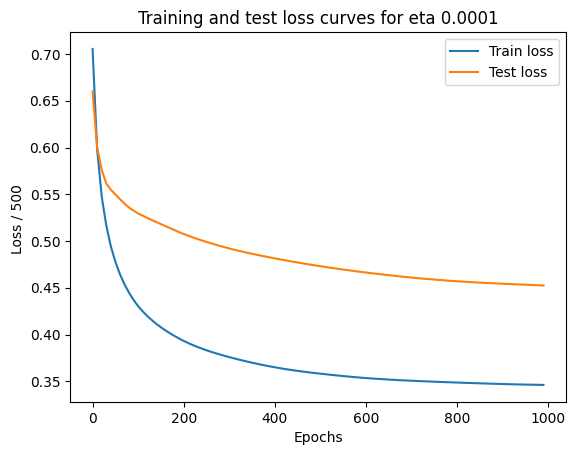

In [23]:
# Plot the loss curves 2
plt.plot(epoch_count2, train_loss_values2, label="Train loss")
plt.plot(epoch_count2, test_loss_values2, label="Test loss")
plt.title("Training and test loss curves for eta 0.0001")
plt.ylabel("Loss / 500 ")
plt.xlabel("Epochs")
plt.legend();

# Q6
**y-test and y-predicted data**

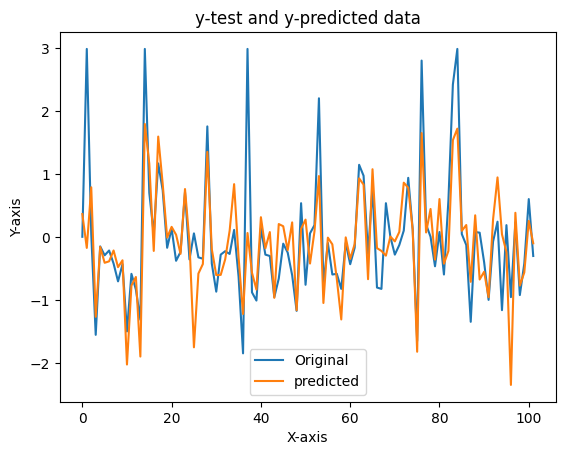

In [24]:
#Forward pass on test data
test_pred = model_0.predict(X_test)

# Plot the loss curves
plt.plot(y_test, label="Original")
plt.plot(test_pred, label="predicted")
plt.title("y-test and y-predicted data")
plt.ylabel("Y-axis")
plt.xlabel("X-axis")
plt.legend();

# Q7
We notes that: `Whenever the learning rate get smaller the convergence takes more time and the result will be more precise`

# Q8
We notes that: `More "iterations" means less "Loss" but at some point the decrese in the "Loss" will be trivial`

# Q9
We notes that: `early stopping will terminate training if the score is not improving by at least tol (default=1e-3)`

# Q10
tol represent: `The stopping criterion (if training is not improving at least by tol after n itration **STOP** training`

# Q11
**predect the price of the house**

In [30]:
from sklearn.linear_model import SGDRegressor
model_1 = SGDRegressor()
model_1.fit(X_train,y_train)
model_1.score(X_train,y_train)

X= scale([1.13081,
   0.00000,
   8.14000,
   0.00000,
   0.53800,
   5.71300,
   94.10000,
   4.23300,
   4.00000,
   307.00000,
   21.00000,
   360.17000,
   22.60000
  ])
X_pred = []
X_pred.append(X)
print(X_pred)
X = np.array(X_pred)
print(X)
(model_1.predict(X))

[array([-0.53046711, -0.54004803, -0.47108089, -0.54004803, -0.53548976,
       -0.49164395,  0.25722566, -0.50418343, -0.50615755,  2.06104679,
       -0.36212298,  2.51153608, -0.34856679])]
[[-0.53046711 -0.54004803 -0.47108089 -0.54004803 -0.53548976 -0.49164395
   0.25722566 -0.50418343 -0.50615755  2.06104679 -0.36212298  2.51153608
  -0.34856679]]


array([23.67177913])

In [31]:
model_1.predict(np.array([X_train[0]]))

array([32.39074186])